In [7]:

import sys 
import os

from PIL import Image
from IPython import display

sys.path.append("..")
sys.path.append("../utlities")

from utlities.directories import IMAGES_FOLDER

from utlities.pinecone_index_utilities import create_index, get_embeddings_and_upsert, create_index
from utlities.text_tags_from_images import create_image_tags_full_dataset, create_image_tags_single_image


In [8]:
EMAIL_TYPE_SYSTEM_PROMPT = """You are a helpful bot who provides detailed information for professionally done marketing emails.
  
Return the output as a json object like so:
{
    "email_content_description": "...", # Describe the main topic described in this email. Avoid any discussion of the product being sold. If the email contains multiple topics, we only care about the top of the email, a.k.a. what is "above the fold" at the top of the email. 1-2 sentences, up to 30 words. 
    "calls_to_action_description": "..." # 1 sentence, up to 15 words.
    "tags": ["First Tag", "Second", ...], #  3-6 tags that we can use for searching. These should be email marketing terms related to the email being sent out, like "Sale", or "Browse Abandonment" or "Survey". AVOID any tags related to the industry or product.
    
}

Please AVOID any discussion that is generic to many well-made marketing emails. 
Some examples of overly generic things to call outare things like "Clean Spacing", Mobile-Optimized", or "Professional". We can assume that all emails in our dataset are like this. 

JSON object:
"""



In [9]:
# test it out on a few images::

{'email_content_description': 'Email focuses on customizing newsletter preferences to receive personalized style news and updates, emphasizing the value of targeted content delivery.', 'calls_to_action_description': 'Click to manage email preferences for personalized style news delivery.', 'tags': ['Preference Management', 'Newsletter Signup', 'Email Customization', 'Welcome Series']}


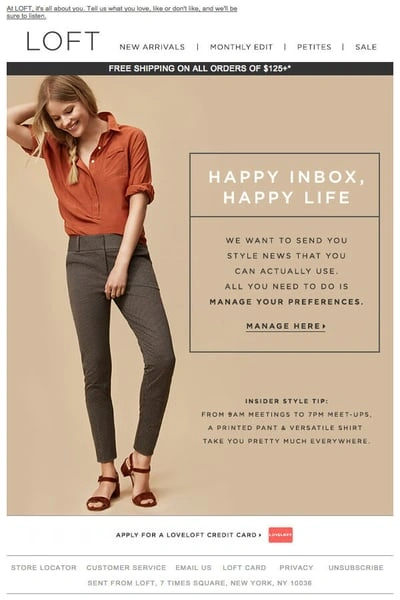

In [10]:
image_file = "email-marketing-examples_25.webp"

print(create_image_tags_single_image(
    image_file,
    EMAIL_TYPE_SYSTEM_PROMPT
))
Image.open(os.path.join(IMAGES_FOLDER, image_file))

{'email_content_description': 'Order confirmation email showing purchase details and shipping status tracker for a recent Crocs order, with order number and delivery information.', 'calls_to_action_description': 'View complete order details or cancel order within 30 minutes of submission.', 'tags': ['Order Confirmation', 'Transactional Email', 'Purchase Receipt', 'Order Tracking']}


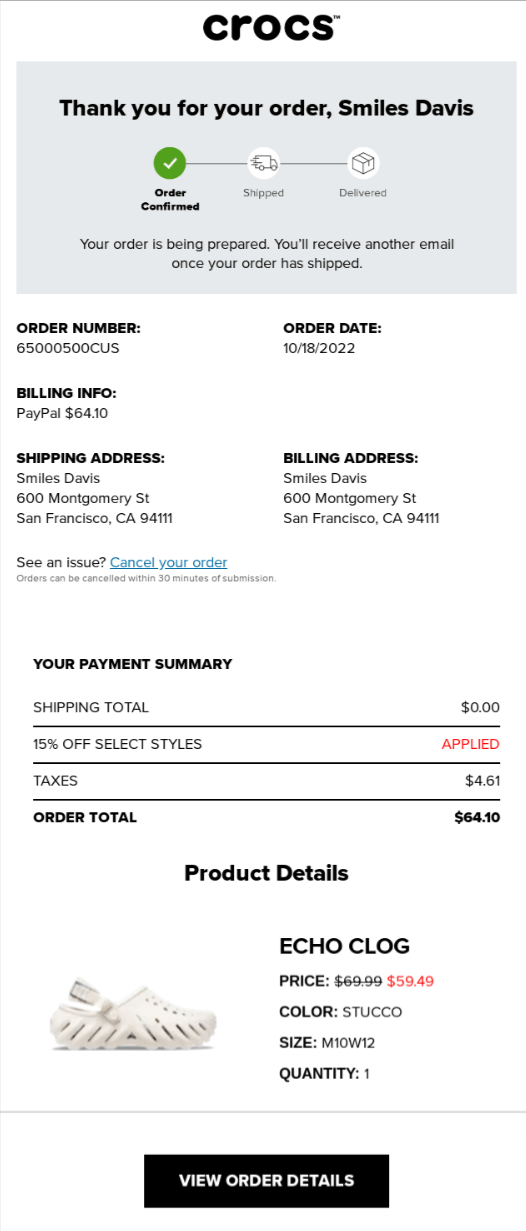

In [11]:
image_file = "crocs-order-details.png"

print(create_image_tags_single_image(
    image_file,
    EMAIL_TYPE_SYSTEM_PROMPT
))

Image.open(os.path.join(IMAGES_FOLDER, image_file))

In [12]:
b = create_image_tags_full_dataset(
    index_name='email-type',
    data_extraction_prompt=EMAIL_TYPE_SYSTEM_PROMPT,  
    batch_size=50,
    tags_to_ignore=['email_content_description','calls_to_action_description']
)
 

258 files to create
batch starting with image 0, 2025-03-04 22:29:31.459644
batch starting with image 50, 2025-03-04 22:29:46.293051
batch starting with image 100, 2025-03-04 22:30:02.468301
batch starting with image 150, 2025-03-04 22:30:16.392890
batch starting with image 200, 2025-03-04 22:30:30.996524
batch starting with image 250, 2025-03-04 22:30:46.758289
Waiting for batch msgbatch_0167gSk37MSrRScsR9oxAXBe
Batch status: MessageBatch(id='msgbatch_0167gSk37MSrRScsR9oxAXBe', archived_at=None, cancel_initiated_at=None, created_at=datetime.datetime(2025, 3, 5, 6, 29, 46, 141585, tzinfo=datetime.timezone.utc), ended_at=None, expires_at=datetime.datetime(2025, 3, 6, 6, 29, 46, 141585, tzinfo=datetime.timezone.utc), processing_status='in_progress', request_counts=MessageBatchRequestCounts(canceled=0, errored=0, expired=0, processing=50, succeeded=0), results_url=None, type='message_batch')
Batch msgbatch_0167gSk37MSrRScsR9oxAXBe still processing...
Batch status: MessageBatch(id='msgbatc

In [13]:

create_index('email-type')
get_embeddings_and_upsert('email-type')



Index before upsert:
{'dimension': 1024,
 'index_fullness': 0.0,
 'namespaces': {'email-type': {'vector_count': 308}},
 'total_vector_count': 308}


Index after upsert:
{'dimension': 1024,
 'index_fullness': 0.0,
 'namespaces': {'email-type': {'vector_count': 308}},
 'total_vector_count': 308}




In [52]:
EMAIL_STYLE_SYSTEM_PROMPT = """You are a helpful bot who provides detailed tags for professioanlly done marketing emails. 
First, describe the header area of an email in 1 sentence (up to 15 words). Marketing emails usually contain multiple topics / components.
We only care about the first one, a.k.a. what is "above the fold" at the top of the email. 

Next, list out the tags for each theme area. 
These tags will be used to help professional email marketers search an inspiration database to discover the emails that are most relevant to their query. 
It's important that you think like a professional marketing designer when writing these tags. 
For each of the following categories, please return 6-10 tags. related to themes you see in the header area. 

Please AVOID any tags that are generic to many well-made marketing emails. 
These are not helpful, as they don't distingish the email from other ones. 
Some examples of overly generic tags to avoid are things like "Clean Spacing", "Clear Hierarchy", "Mobile-Optimized", or "Professional". We can assume that all emails in our dataset are like this. 

Return the output as a json object like so:
{
    "header_area_description": "...", # 1 sentence, up to 15 words describing the layout in words.
    "layout": ["First Tag", "Second", ...],  # 10-15 tags. repeat the description as tags.
    "brand_style": [...], # 6 tags. what words best represent the brand style/voice of this email? What's the art style? 
    "text": [...],  # 6 tags.what kinds of fonts and text formats do they use, what techniques are used in laying out text?
    "color_scheme": [...], # 6 tags. how would you describe the vibe of color scheme? (don't say specific colors, though) 
}
"""



{'header_area_description': 'Clean navigation bar with logo and categories, followed by free shipping banner and email preferences box.', 'layout': ['Horizontal Navigation Menu', 'Centered Logo', 'Black Promotional Banner', 'Split Content Layout', 'Left Image Right Text', 'Boxed Content Module', 'Minimalist Header Design', 'Utility Navigation Top', 'Promotional Header Strip', 'Category Menu Bar'], 'brand_style': ['Sophisticated Casual', 'Modern Minimalist', 'Understated Elegance', 'Professional Chic', 'Urban Contemporary', 'Refined Simplicity'], 'text': ['Sans Serif Headlines', 'All-Caps Emphasis', 'Centered Box Copy', 'Hierarchical Typography', 'Subtle Link Styling', 'Balanced Text Blocks'], 'color_scheme': ['Neutral Dominant', 'Earth Tone Palette', 'Monochromatic Base', 'Warm Undertones', 'Muted Sophistication', 'Desert-Inspired Tones']}


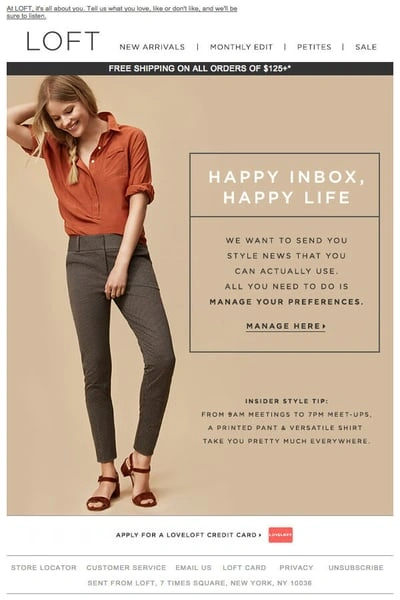

In [53]:
image_file = "email-marketing-examples_25.webp"

print(create_image_tags_single_image(
    image_file,
    EMAIL_STYLE_SYSTEM_PROMPT
))
Image.open(os.path.join(IMAGES_FOLDER, image_file))

{'header_area_description': 'Simple order confirmation with three-step progress tracker showing order status from confirmed to delivery.', 'layout': ['Progress Tracker Icons', 'Status Timeline', 'Checkmark Confirmation', 'Delivery Status Icons', 'Order Status Visualization', 'Horizontal Process Flow', 'Minimalist Header Design', 'Order Confirmation Layout', 'Shipping Status Display'], 'brand_style': ['Minimalist', 'Contemporary', 'Straightforward', 'No-frills', 'Utilitarian', 'Direct'], 'text': ['Sans-serif Headers', 'Bold Order Numbers', 'Status Labels', 'Hierarchical Information', 'Condensed Typography', 'Clear Section Headers'], 'color_scheme': ['Monochromatic', 'Success Green Accent', 'Neutral Background', 'Grayscale Dominant', 'Subtle Contrast', 'Functional Palette']}


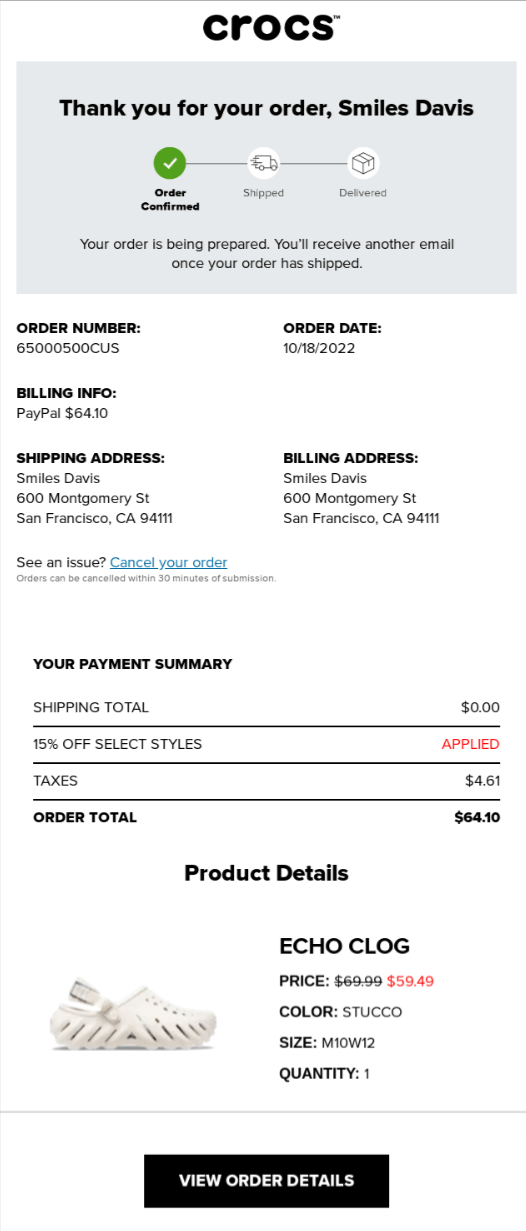

In [54]:
image_file = "crocs-order-details.png"

print(create_image_tags_single_image(
    image_file,
    EMAIL_STYLE_SYSTEM_PROMPT
))
Image.open(os.path.join(IMAGES_FOLDER, image_file))

In [55]:
b = create_image_tags_full_dataset(
    index_name='email-header-focus-fewer-tags',
    data_extraction_prompt=EMAIL_STYLE_SYSTEM_PROMPT, 
    tags_to_ignore='header_area_description',
    batch_size=80,
)
 

In [50]:

create_index('email-header-focus-fewer-tags')
get_embeddings_and_upsert('email-header-focus-fewer-tags')

